# Text Classification
Dataset: AG News Classification Dataset
https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset/data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

import spacy
nlp = spacy.load('en_core_web_sm')

from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /Users/hytung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hytung/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hytung/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/hytung/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Class Index
# Consists of class ids 1-4 where 1-World, 2-Sports, 3-Business, 4-Sci/Tech

In [29]:
# load the data
train_df = pd.read_csv('train.csv')
train_df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [30]:
print(train_df.shape)
print(train_df.info())

(120000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB
None


In [31]:
# NLP
# Change all the text to lower case. 
train_df['Title'] = [title.lower() for title in train_df['Title']]


# Tokenization and Remove Stop words, Word Lemmatization
#nltk
customStopWords=stopwords.words('english')+list(punctuation)

lemmatizer = WordNetLemmatizer()
for index, entry in enumerate(train_df['Title']):
    tokens = [lemmatizer.lemmatize(token) for token in nltk.word_tokenize(entry) if ((str(token) not in customStopWords))]
    train_df.loc[index, 'clean_title'] = " ".join(tokens)

# remove short words (length < 2)
train_df['clean_title'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

#spaCy
'''
stop_words = list(STOP_WORDS)
for index, entry in enumerate(df['name']):
    tokens = [token.lemma_ for token in nlp(entry) if ((str(token) not in stop_words) and (token.is_alpha == True))]
    df.loc[index,'clean_title'] = " ".join(tokens)
'''
train_df.head()

,Class Index,Title,Description,clean_title
0,3,wall st. bears claw back into the black (reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall st. bear claw back black reuters
1,3,carlyle looks toward commercial aerospace (reu...,Reuters - Private investment firm Carlyle Grou...,carlyle look toward commercial aerospace reuters
2,3,oil and economy cloud stocks' outlook (reuters),Reuters - Soaring crude prices plus worries\ab...,oil economy cloud stock outlook reuters
3,3,iraq halts oil exports from main southern pipe...,Reuters - Authorities have halted oil export\f...,iraq halt oil export main southern pipeline re...
4,3,"oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",oil price soar all-time record posing new mena...


In [32]:
#NLP
# Change all the text to lower case. 
train_df['Description'] = [d.lower() for d in train_df['Description']]

# Tokenization and Remove Stop words, Word Lemmatization
#nltk
for index, entry in enumerate(train_df['Description']):
    sentences = nltk.sent_tokenize(entry)
    for sentence in sentences:
        tokens = [lemmatizer.lemmatize(token) for token in nltk.word_tokenize(sentence) if token not in customStopWords]
        train_df.loc[index, 'clean_description'] = " ".join(tokens)
        
# remove short words (length < 2)
train_df['clean_description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

train_df.head()

,Class Index,Title,Description,clean_title,clean_description
0,3,wall st. bears claw back into the black (reuters),"reuters - short-sellers, wall street's dwindli...",wall st. bear claw back black reuters,reuters short-sellers wall street 's dwindling...
1,3,carlyle looks toward commercial aerospace (reu...,reuters - private investment firm carlyle grou...,carlyle look toward commercial aerospace reuters,reuters private investment firm carlyle group ...
2,3,oil and economy cloud stocks' outlook (reuters),reuters - soaring crude prices plus worries\ab...,oil economy cloud stock outlook reuters,reuters soaring crude price plus worries\about...
3,3,iraq halts oil exports from main southern pipe...,reuters - authorities have halted oil export\f...,iraq halt oil export main southern pipeline re...,reuters authority halted oil export\flows main...
4,3,"oil prices soar to all-time record, posing new...","afp - tearaway world oil prices, toppling reco...",oil price soar all-time record posing new mena...,afp tearaway world oil price toppling record s...


In [7]:
from wordcloud import WordCloud

In [8]:
world = train_df[train_df["Class Index"] == 1]["clean_title"]
sports = train_df[train_df["Class Index"] == 2]["clean_title"]
business = train_df[train_df["Class Index"] == 3]["clean_title"]
scitech = train_df[train_df["Class Index"] == 4]["clean_title"]


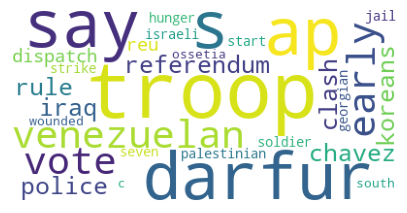

In [9]:
wordcloud1 = WordCloud(max_font_size=80,max_words=30, background_color="white").generate(str(world))
plt.figure(figsize=(5,4))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

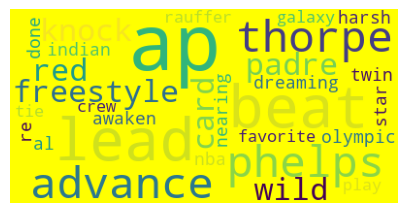

In [10]:
wordcloud2 = WordCloud(max_font_size=80,max_words=30, background_color="yellow").generate(str(sports))
plt.figure(figsize=(5,4))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

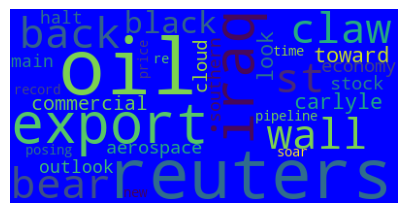

In [11]:
wordcloud3 = WordCloud(max_font_size=80,max_words=30, background_color="blue").generate(str(business))
plt.figure(figsize=(5,4))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

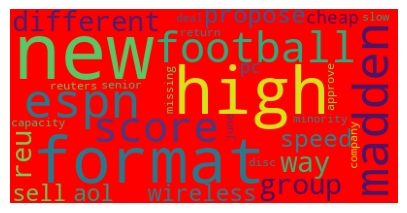

In [12]:
wordcloud4= WordCloud(max_font_size=80,max_words=30, background_color="red").generate(str(scitech))
plt.figure(figsize=(5,4))
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

In [13]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [14]:
# NLP
# Change all the text to lower case. 
test_df['Title'] = [title.lower() for title in test_df['Title']]


# Tokenization and Remove Stop words, Word Lemmatization
#nltk

lemmatizer = WordNetLemmatizer()
for index, entry in enumerate(test_df['Title']):
    tokens = [lemmatizer.lemmatize(token) for token in nltk.word_tokenize(entry) if ((str(token) not in customStopWords))]
    test_df.loc[index, 'clean_title'] = " ".join(tokens)

# remove short words (length < 2)
test_df['clean_title'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

#spaCy
'''
stop_words = list(STOP_WORDS)
for index, entry in enumerate(df['name']):
    tokens = [token.lemma_ for token in nlp(entry) if ((str(token) not in stop_words) and (token.is_alpha == True))]
    df.loc[index,'clean_title'] = " ".join(tokens)
'''
test_df

,Class Index,Title,Description,clean_title
0,3,fears for t n pension after talks,Unions representing workers at Turner Newall...,fear n pension talk
1,4,the race is on: second private team sets launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",race second private team set launch date human...
2,4,ky. company wins grant to study peptides (ap),AP - A company founded by a chemistry research...,ky. company win grant study peptide ap
3,4,prediction unit helps forecast wildfires (ap),AP - It's barely dawn when Mike Fitzpatrick st...,prediction unit help forecast wildfire ap
4,4,calif. aims to limit farm-related smog (ap),AP - Southern California's smog-fighting agenc...,calif. aim limit farm-related smog ap
...,...,...,...,...
7595,1,around the world,Ukrainian presidential candidate Viktor Yushch...,around world
7596,2,void is filled with clement,With the supply of attractive pitching options...,void filled clement
7597,2,martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,martinez leaf bitter
7598,3,5 of arthritis patients in singapore take bext...,SINGAPORE : Doctors in the United States have ...,5 arthritis patient singapore take bextra cele...


In [15]:
#NLP
# Change all the text to lower case. 
test_df['Description'] = [d.lower() for d in test_df['Description']]

# Tokenization and Remove Stop words, Word Lemmatization
#nltk
for index, entry in enumerate(test_df['Description']):
    sentences = nltk.sent_tokenize(entry)
    for sentence in sentences:
        tokens = [lemmatizer.lemmatize(token) for token in nltk.word_tokenize(sentence) if token not in customStopWords]
        test_df.loc[index, 'clean_description'] = " ".join(tokens)
        
# remove short words (length < 2)
test_df['clean_description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

test_df

,Class Index,Title,Description,clean_title,clean_description
0,3,fears for t n pension after talks,unions representing workers at turner newall...,fear n pension talk,union representing worker turner newall say 'd...
1,4,the race is on: second private team sets launc...,"space.com - toronto, canada -- a second\team o...",race second private team set launch date human...,space.com toronto canada -- second\team rocket...
2,4,ky. company wins grant to study peptides (ap),ap - a company founded by a chemistry research...,ky. company win grant study peptide ap,ap company founded chemistry researcher univer...
3,4,prediction unit helps forecast wildfires (ap),ap - it's barely dawn when mike fitzpatrick st...,prediction unit help forecast wildfire ap,wind pick moist place dry flame roar
4,4,calif. aims to limit farm-related smog (ap),ap - southern california's smog-fighting agenc...,calif. aim limit farm-related smog ap,ap southern california 's smog-fighting agency...
...,...,...,...,...,...
7595,1,around the world,ukrainian presidential candidate viktor yushch...,around world,ukrainian presidential candidate viktor yushch...
7596,2,void is filled with clement,with the supply of attractive pitching options...,void filled clement,supply attractive pitching option dwindling da...
7597,2,martinez leaves bitter,like roger clemens did almost exactly eight ye...,martinez leaf bitter,like roger clemens almost exactly eight year e...
7598,3,5 of arthritis patients in singapore take bext...,singapore : doctors in the united states have ...,5 arthritis patient singapore take bextra cele...,singapore doctor united state warned painkille...


In [16]:
train_y = train_df['Class Index']
train_X = train_df['clean_description']

test_y = test_df['Class Index']
test_X = test_df['clean_description']

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(120000,)
(7600,)
(120000,)
(7600,)


In [17]:
# Calculate TF-TDF
####  Term Frequency: This summarizes how often a given word appears within a document
#### Inverse Document Frequency: This down scales words that appear a lot across documents

In [18]:
Tfidf_vect = TfidfVectorizer(stop_words=stopwords.words('english'), max_df=0.8)

Tfidf_vect.fit(train_X)

train_X_Tfidf = Tfidf_vect.transform(train_X)
test_X_Tfidf = Tfidf_vect.transform(test_X)

In [25]:
print(train_X_Tfidf.shape)

(120000, 51269)


In [27]:
print(train_X_Tfidf[0])

  (0, 49330)	0.21634792001002268
  (0, 47381)	0.32685174727246347
  (0, 43885)	0.20600837468145844
  (0, 41499)	0.23746711484447605
  (0, 40815)	0.4161849169034952
  (0, 40738)	0.3048623255849083
  (0, 38627)	0.12277953710631047
  (0, 20265)	0.24314726765934677
  (0, 15037)	0.3641405091300206
  (0, 12365)	0.4353623858523988
  (0, 5611)	0.29162713045085753


In [ ]:
# Coverting to dense matrix and putting in a dataframe to view the Tfidf matrix
dense_mat = train_X_Tfidf.todense()
tfidf_Mat = pd.DataFrame(dense_mat, columns=Tfidf_vect.get_feature_names_out())
tfidf_Mat.head()

,00,000,000016447,0002,0004287,0005173miami050,000660,0009875buffalo040,000bn,000km,...,zvezda,zviadauri,zvonareva,zwick,zy,zydrunas,zygmunt,zyprexa,zz,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print([col for col in tfidf_Mat.columns])

['00', '000', '000016447', '0002', '0004287', '0005173miami050', '000660', '0009875buffalo040', '000bn', '000km', '000m', '000metres', '000mph', '000rpm', '000th', '001', '001107539', '001273145', '0013', '002', '002d', '004', '0040', '005380', '005930', '008', '00am', '00pm', '01', '010', '0100', '0115', '0125', '013', '0133', '0141', '01473', '0151', '02', '024', '025', '025bil', '026', '027', '028', '0291', '03', '0300', '033', '034220', '035', '0355', '037', '038', '04', '040', '0409231157', '042', '045', '046', '048', '04m', '04q4', '05', '050', '051', '052', '0530', '054', '056', '058', '059', '06', '060', '0600', '0630', '064', '0645', '065', '066', '0669', '068', '069', '06pm', '07', '070', '072', '075', '0753', '076', '0763', '078', '07bn', '08', '080', '081', '082', '086', '087', '08bn', '09', '0906', '096', '0992', '0ghz', '0i', '0pr', '10', '100', '1000', '1000kg', '1000m', '1000th', '1001', '10084803', '100bn', '100d', '100ft', '100gb', '100km', '100m', '100million', '100t

In [ ]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(train_X_Tfidf, train_y)

# predict the labels on train dataset
pred_train = Naive.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test = Naive.predict(test_X_Tfidf)

# Use classification_report function to get the accuracy
report = classification_report(test_y, pred_test)
print(report)

              precision    recall  f1-score   support

           1       0.87      0.88      0.87      1900
           2       0.93      0.94      0.94      1900
           3       0.84      0.84      0.84      1900
           4       0.85      0.84      0.85      1900

    accuracy                           0.87      7600
   macro avg       0.87      0.87      0.87      7600
weighted avg       0.87      0.87      0.87      7600



In [ ]:
# fit the training dataset on the NB classifier
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(train_X_Tfidf, train_y)

# get predictions with the fitted model
dtree_preds = dtree.predict(test_X_Tfidf)
report = classification_report(test_y, dtree_preds)
print(report)

              precision    recall  f1-score   support

           1       0.90      0.32      0.47      1900
           2       0.33      0.99      0.50      1900
           3       0.71      0.33      0.45      1900
           4       0.83      0.15      0.25      1900

    accuracy                           0.45      7600
   macro avg       0.69      0.45      0.42      7600
weighted avg       0.69      0.45      0.42      7600



In [ ]:
'''
__Observation__: 

    Recall is the performance metric in this case. 
    Based on the Recall score, naive_bayes performed better than others.
'''

'\n__Observation__: \n\n    Recall is the performance metric in this case. \n    Based on the Recall score, SVM performed better than Naive Bayes\n'